In [8]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [9]:

CPU_FILE = 'cpu.csv'
STEPS_FILE = 'steps.csv'

# Load CSV files into dataframes
cpu_df = pd.read_csv(CPU_FILE)
steps_df = pd.read_csv(STEPS_FILE)

# Convert 'Timestamp' columns to datetime objects
cpu_df['Timestamp'] = pd.to_datetime(cpu_df['Timestamp'])
steps_df['timestamp'] = pd.to_datetime(steps_df['timestamp'])

# Merge dataframes on the closest timestamp
merged_df = pd.merge_asof(cpu_df, steps_df, left_on='Timestamp', right_on='timestamp', direction='backward')

# Drop redundant timestamp column
merged_df = merged_df.drop(columns='timestamp')

# Fill NaN values in 'event' column with a placeholder value
merged_df['event'] = merged_df['event'].fillna('N/A')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)

# Display the merged dataframe
print(merged_df)



              Timestamp  CPU  CPU MHz     module  event
0   2024-01-22 08:10:22    0    800.0        NaN    N/A
1   2024-01-22 08:10:22    1    800.0        NaN    N/A
2   2024-01-22 08:10:22    2    800.0        NaN    N/A
3   2024-01-22 08:10:22    3    800.0        NaN    N/A
4   2024-01-22 08:10:22    4    800.0        NaN    N/A
..                  ...  ...      ...        ...    ...
955 2024-01-22 08:12:49   27    800.0  rigidbody  start
956 2024-01-22 08:12:49   28    800.0  rigidbody  start
957 2024-01-22 08:12:49   29   2500.0  rigidbody  start
958 2024-01-22 08:12:49   30    800.0  rigidbody  start
959 2024-01-22 08:12:49   31    800.0  rigidbody  start

[960 rows x 5 columns]


In [10]:
# Filter data for the first hour
merged_df = merged_df[merged_df['Timestamp'] < merged_df['Timestamp'].min() + pd.Timedelta(hours=1)]

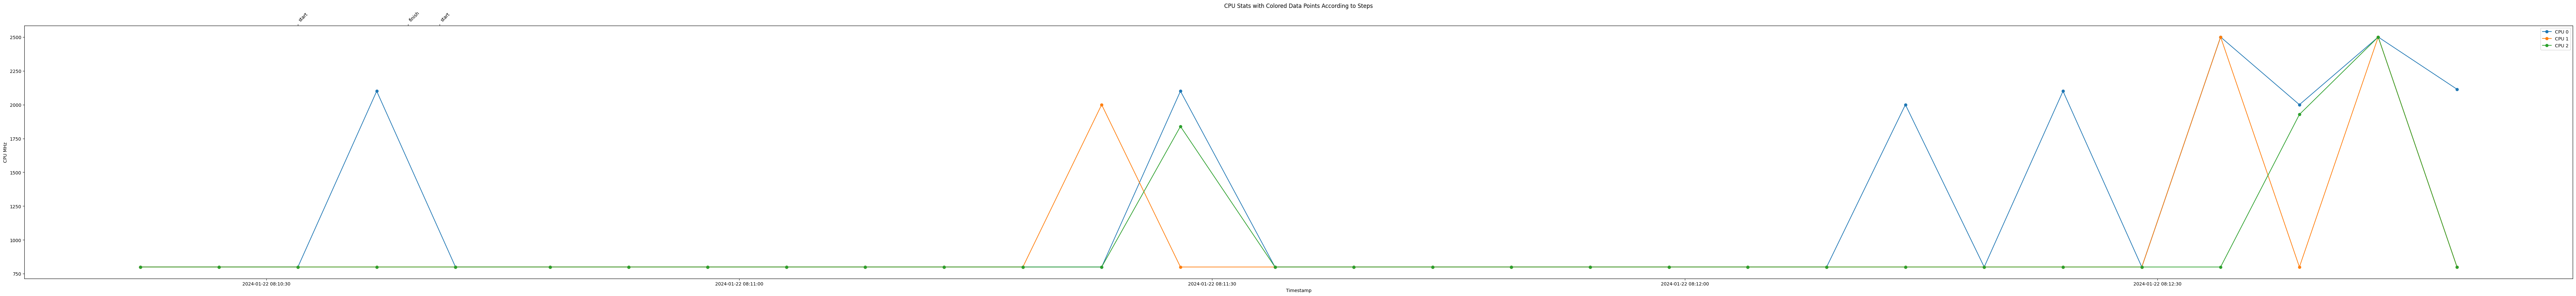

In [11]:


# Plot CPU stats with colored data points according to steps
fig, ax1 = plt.subplots(figsize=(100, 10))

# for cpu in merged_df['CPU'].unique():
for cpu in [0, 1, 2]:
    # for cpu in [0]:
    cpu_data = merged_df[merged_df['CPU'] == cpu]
    ax1.plot(cpu_data['Timestamp'], cpu_data['CPU MHz'], marker='o', linestyle='-', label=f'CPU {cpu}')

# Set the second x-axis for steps
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(steps_df['timestamp'])
ax2.set_xticklabels(steps_df['event'], rotation=45, ha='left')

# Format the x-axis date ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Set custom x-axis and y-axis ticks for better visualization
x_ticks = pd.date_range(start=cpu_df['Timestamp'].min(), end=cpu_df['Timestamp'].max(), freq='30min')
y_ticks = range(0, int(cpu_df['CPU MHz'].max()) + 200, 200)

# Set labels and title
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('CPU MHz')
ax1.legend()
plt.title('CPU Stats with Colored Data Points According to Steps')

# Show the plot
fig.savefig("cpu_over_time.png")
# plt.show()

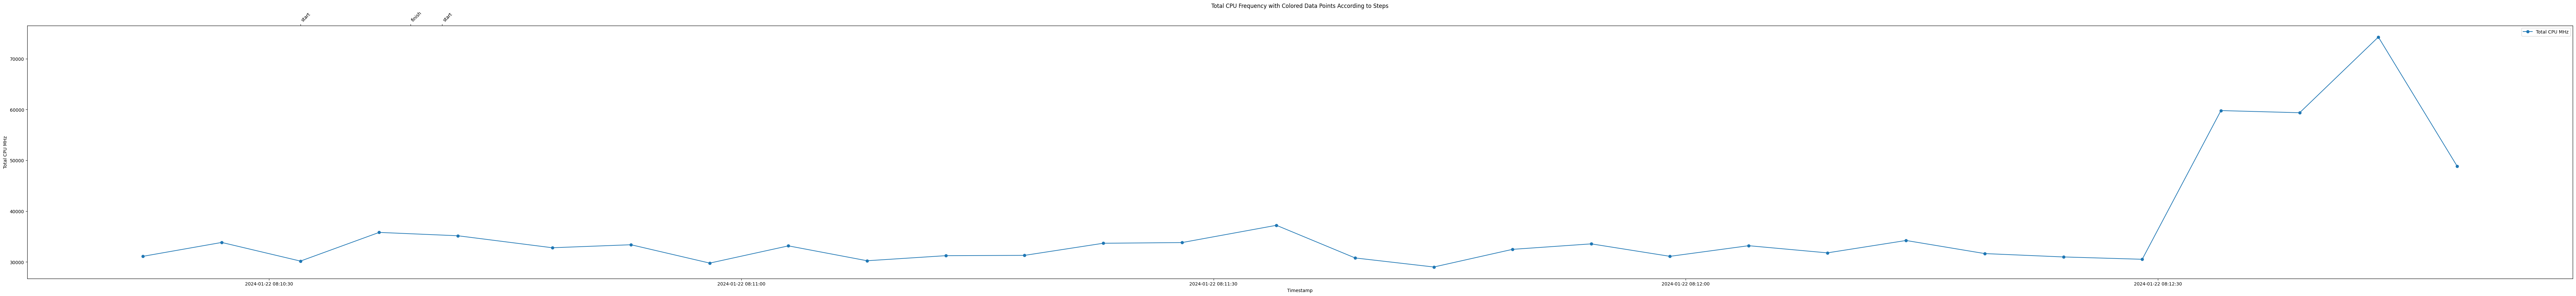

In [12]:

# Sum CPU MHz values across all CPUs for each timestamp
total_freq = cpu_df.groupby('Timestamp')['CPU MHz'].sum().reset_index()

# Plot total CPU frequency with colored data points according to steps
fig, ax1 = plt.subplots(figsize=(100, 10))

ax1.plot(total_freq['Timestamp'], total_freq['CPU MHz'], marker='o', linestyle='-', label='Total CPU MHz')

# Set the second x-axis for steps
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(steps_df['timestamp'])
ax2.set_xticklabels(steps_df['event'], rotation=45, ha='left')

# Format the x-axis date ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Set custom x-axis and y-axis ticks for better visualization
x_ticks = pd.date_range(start=cpu_df['Timestamp'].min(), end=cpu_df['Timestamp'].max(), freq='30min')
y_ticks = range(0, int(total_freq['CPU MHz'].max()) + 200, 200)

# Set labels and title
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Total CPU MHz')
ax1.legend()
plt.title('Total CPU Frequency with Colored Data Points According to Steps')

# Show the plot
fig.savefig("total_cpu_over_time.png")
# plt.show()


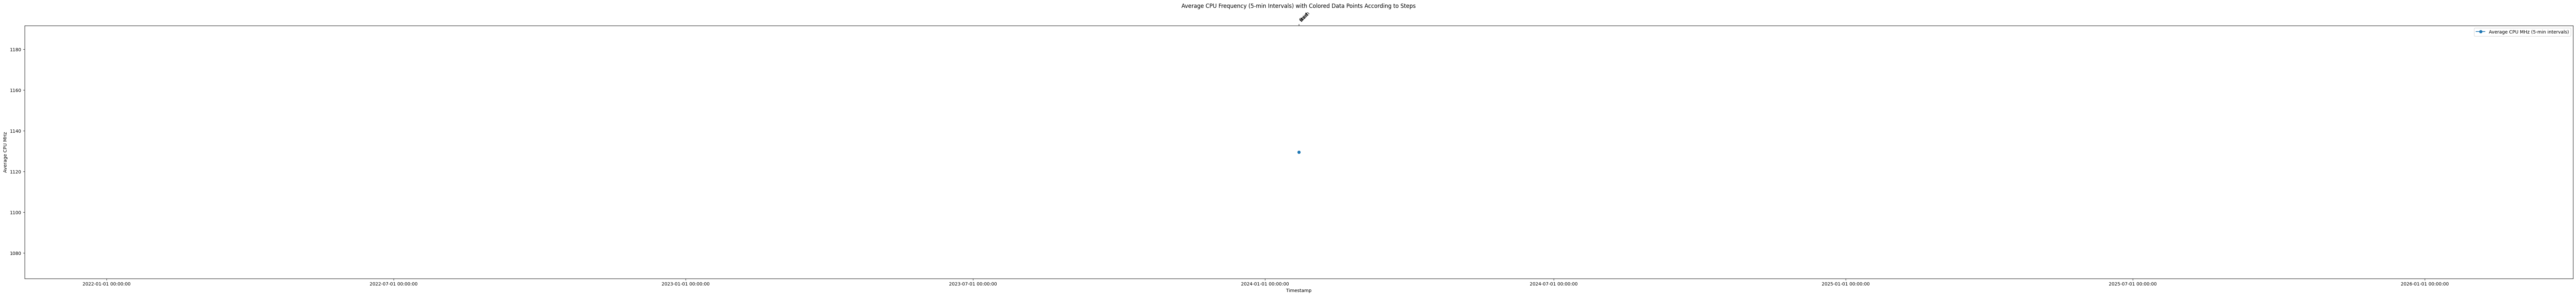

In [13]:
avg_freq = cpu_df.groupby(pd.Grouper(key='Timestamp', freq='5Min'))['CPU MHz'].mean().reset_index()

# Plot average CPU frequency with colored data points according to steps
fig, ax1 = plt.subplots(figsize=(100, 10))

ax1.plot(avg_freq['Timestamp'], avg_freq['CPU MHz'], marker='o', linestyle='-',
         label='Average CPU MHz (5-min intervals)')

# Set the second x-axis for steps
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(steps_df['timestamp'])
ax2.set_xticklabels(steps_df['event'], rotation=45, ha='left')

# Format the x-axis date ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Set custom x-axis and y-axis ticks for better visualization
x_ticks = pd.date_range(start=cpu_df['Timestamp'].min(), end=cpu_df['Timestamp'].max(), freq='30min')
y_ticks = range(0, int(avg_freq['CPU MHz'].max()) + 200, 200)

# Set labels and title
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Average CPU MHz')
ax1.legend()
plt.title('Average CPU Frequency (5-min Intervals) with Colored Data Points According to Steps')

# Show the plot
fig.savefig("average_cpu_over_time.png")
# plt.show()

In [14]:
# Calculate average CPU MHz values in 5-minute intervals
avg_freq = cpu_df.groupby(pd.Grouper(key='Timestamp', freq='5Min'))['CPU MHz'].mean().reset_index()

# Plot average CPU frequency with colored data points according to steps
fig, ax1 = plt.subplots(figsize=(100, 10))

ax1.plot(avg_freq['Timestamp'], avg_freq['CPU MHz'], marker='o', linestyle='-',
         label='Average CPU MHz (5-min intervals)')

# Set the second x-axis for steps
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(steps_df['timestamp'])
ax2.set_xticklabels([])  # Clear default labels

# Format the x-axis date ticks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Set custom x-axis and y-axis ticks for better visualization
x_ticks = pd.date_range(start=cpu_df['Timestamp'].min(), end=cpu_df['Timestamp'].max(), freq='30min')
y_ticks = range(0, int(avg_freq['CPU MHz'].max()) + 200, 200)

# Add step labels
for index, row in steps_df.iterrows():
    if index % 2 == 1:
        continue
    step_start = row['timestamp']
    step_finish = steps_df.loc[index + 1, 'timestamp'] if index < len(steps_df) - 1 else avg_freq['Timestamp'].max()
    step_label = f'{row["module"]}'
    step_label_x = step_start + (step_finish - step_start) / 2
    print(step_label, step_label_x, (step_label_x, 0))
    ax2.text(mdates.date2num(step_label_x), 0, step_label, ha='center')

# Set labels and title
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Average CPU MHz')
ax1.legend()
plt.title('Average CPU Frequency (5-min Intervals) with Colored Data Points According to Steps')

# Show the plot
fig.savefig("average_cpu_over_time.png")
# plt.show()

topoaa 2024-01-22 08:10:35.500000 (Timestamp('2024-01-22 08:10:35.500000'), 0)
rigidbody 2024-01-22 08:10:20.500000 (Timestamp('2024-01-22 08:10:20.500000'), 0)


C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_23164\527382772.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_all.resample('0.1T', on='Timestamp').mean()


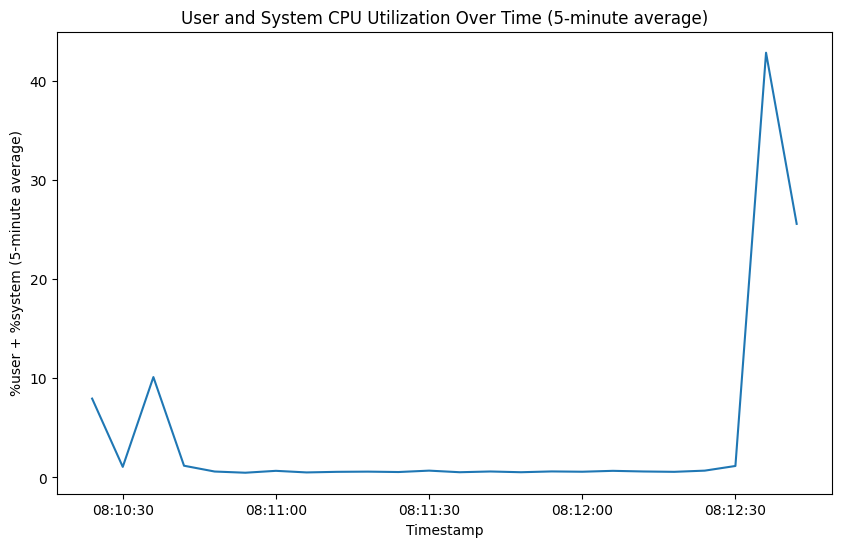

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('cpu_utilization.csv')
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a new column '%user_system'
df['%user_system'] = df['%user'] + df['%system']

df_all = df[df['CPU'] == 'all']

# Resample the data every 5 minutes and calculate the mean
df_resampled = df_all.resample('0.1T', on='Timestamp').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['%user_system'])
plt.xlabel('Timestamp')
plt.ylabel('%user + %system (5-minute average)')
plt.title('User and System CPU Utilization Over Time (5-minute average)')
plt.savefig("user_system_cpu_over_time.png")
# plt.show()

C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_23164\3653703924.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_cpu.resample('.1T', on='Timestamp').mean()
C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_23164\3653703924.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_cpu.resample('.1T', on='Timestamp').mean()
C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_23164\3653703924.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select onl

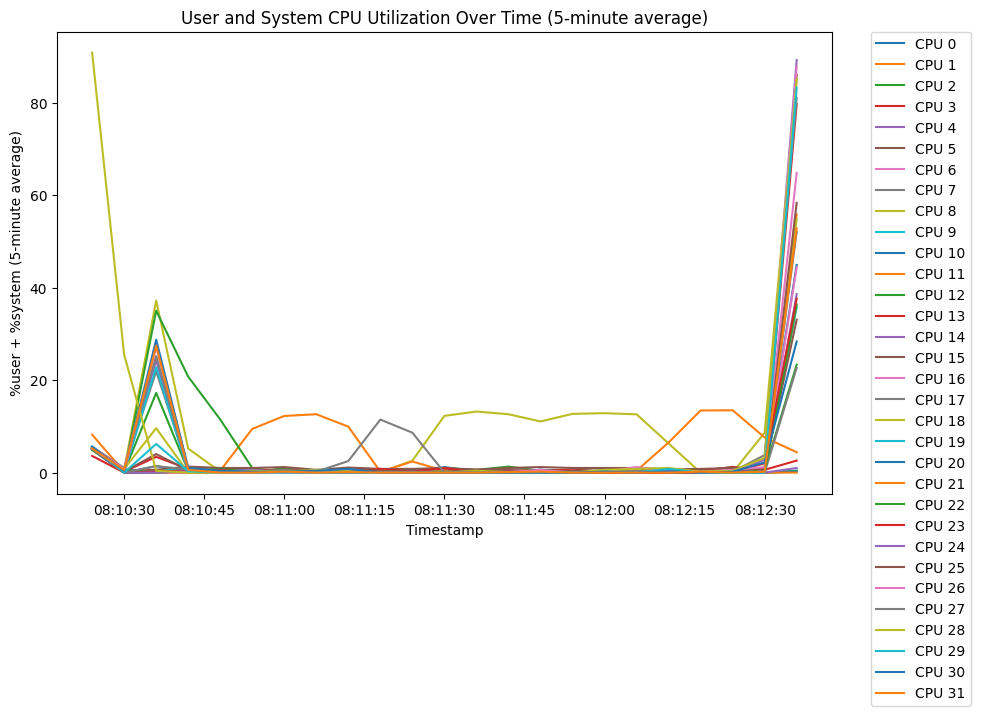

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('cpu_utilization.csv')

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a new column '%user_system'
df['%user_system'] = df['%user'] + df['%system']

# Exclude rows where 'CPU' is 'all'
df = df[df['CPU'] != 'all']

# Create a figure
plt.figure(figsize=(10, 6))

# Loop over unique CPU values
for cpu in df['CPU'].unique():
    # Filter the DataFrame for the current CPU
    df_cpu = df[df['CPU'] == cpu]

    # Resample the data every 5 minutes and calculate the mean
    df_resampled = df_cpu.resample('.1T', on='Timestamp').mean()

    # Plot the data
    plt.plot(df_resampled.index, df_resampled['%user_system'], label=f'CPU {cpu}')

# Add labels, title, and legend
plt.xlabel('Timestamp')
plt.ylabel('%user + %system (5-minute average)')
plt.title('User and System CPU Utilization Over Time (5-minute average)')
# plt.legend()

# shift legend to right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Save the plot
plt.savefig("user_system_cpu_over_time_every.png")

# Show the plot
# plt.show()

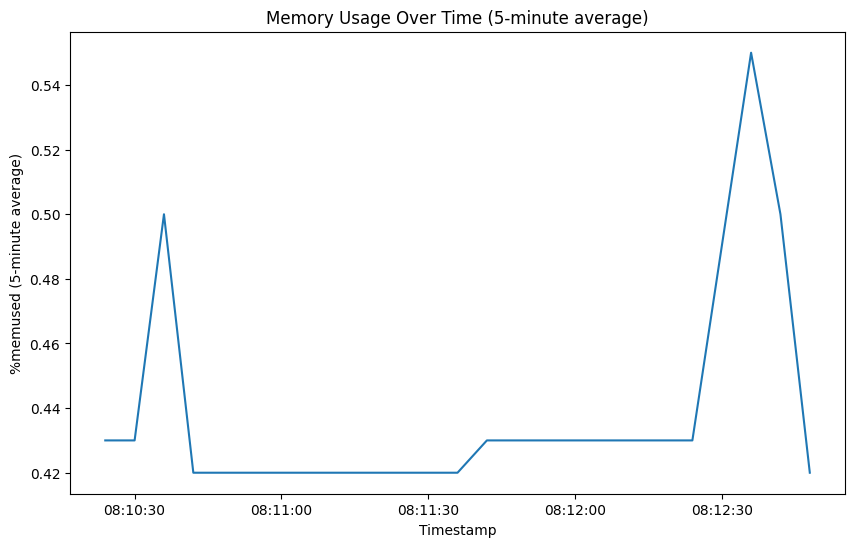

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('memory.csv')

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Resample the data every 5 minutes and calculate the mean
df_resampled = df.resample('.1T', on='Timestamp').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['%memused'])
plt.xlabel('Timestamp')
plt.ylabel('%memused (5-minute average)')
plt.title('Memory Usage Over Time (5-minute average)')
plt.savefig("memory_over_time.png")
# plt.show()